<a href="https://colab.research.google.com/github/HektorLin/Etherscan_visualization/blob/master/Etherscan_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this exercise is to show various plotting techniques, using an Ethereum dataset.

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, YearLocator, MonthLocator
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# Univariate Plots

Data for all plots in this section is the Ethereum network utilization rate time-series downloaded from https://etherscan.io/chart/networkutilization.

Note that except for heatmap, where a 2D matrix is needed, all the other plots require only a single time-series, or a time-series truncated at a certain time interval.

In [3]:
# load the dataset.
# Replication can easily be done by replacing the dataset.
df = pd.read_csv("data/export-NetworkUtilization.csv",sep=",")

# re-format the column names to non-unique, as the axis labels can always be renamed later, depending on the variable of interest
# and from the date, separate year, month and week
df["Date(UTC)"] = pd.to_datetime(df["Date(UTC)"])
df.columns = ["Date","TimeStamp","Value"]
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.week

# visualize the data
df.head()

,Date,TimeStamp,Value,Year,Month,Week
0,2015-07-30,1438214400,0.000,2015,7,31
1,2015-07-31,1438300800,0.000,2015,7,31
2,2015-08-01,1438387200,0.000,2015,8,31
3,2015-08-02,1438473600,0.000,2015,8,31
4,2015-08-03,1438560000,0.000,2015,8,32


## Set global SNS tick and label size

In [4]:
sns.set(font_scale = 3)
sns.set_style("white")

## Time-Series Line Charts

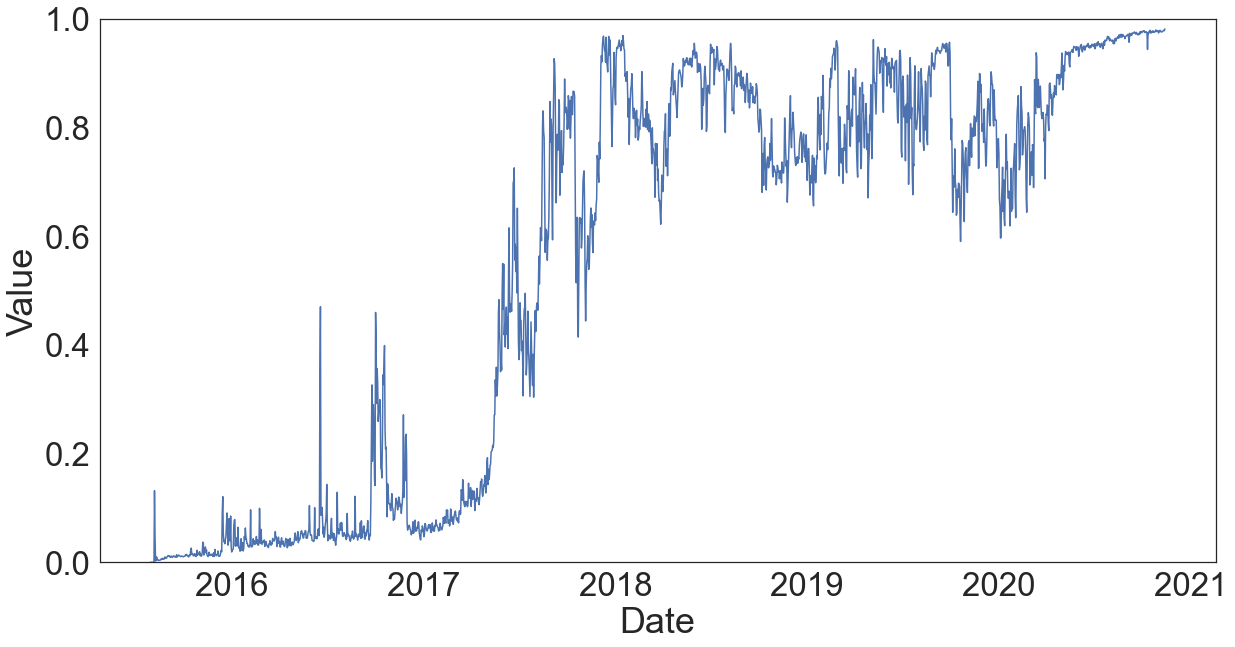

In [15]:
# time series plot
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=df)
# ax.set_ylabel('This can be renamed', color='b')

years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
#this sets the x ticks at year level
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.set_ylim(0,1) #this determines the range of y axis, but it can be omitted and let python to decide by default.
plt.savefig('timeser.png', transparent = True) 

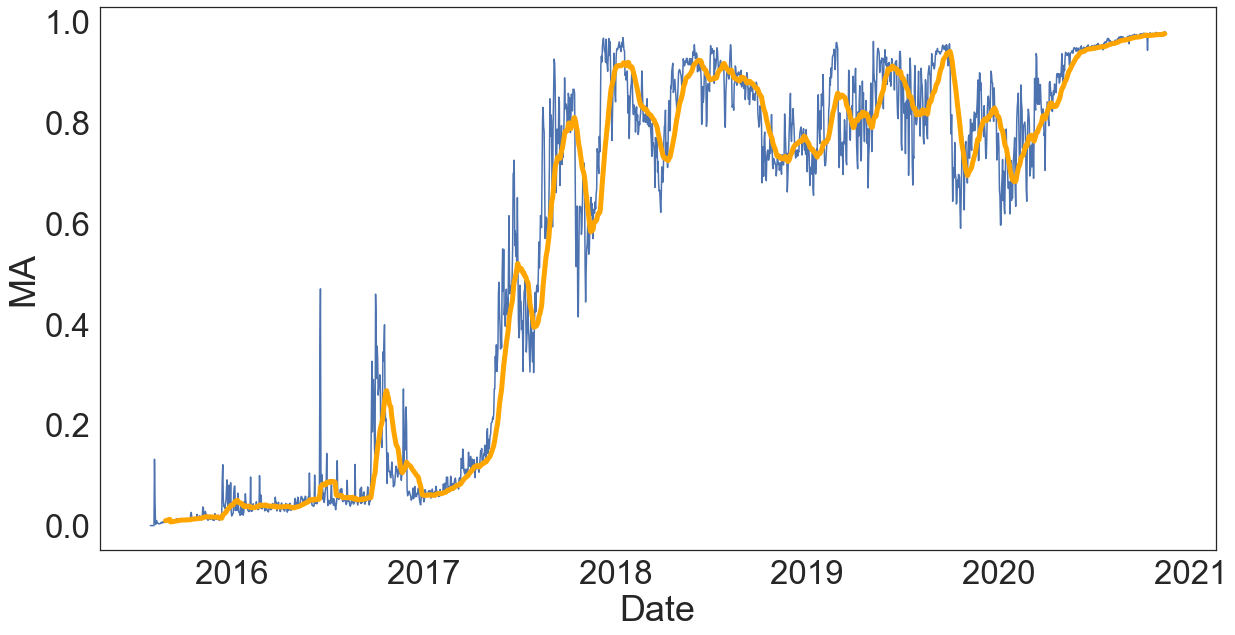

In [17]:
# time series with moving average (30 days)
plot_df = df.copy()
plot_df["MA"] = plot_df["Value"].rolling(30).mean() 
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=plot_df)
ax = sns.lineplot(x="Date", y="MA", data=plot_df, linewidth=5, color="orange")
plt.savefig('MA30.png', transparent = True)

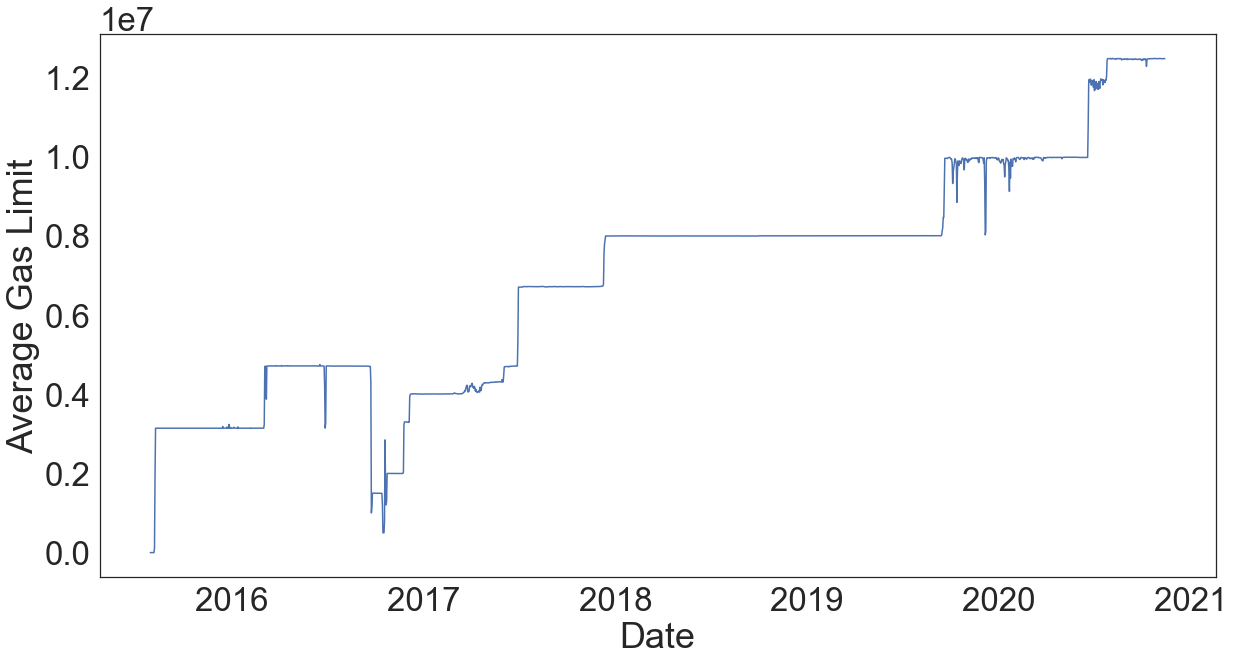

In [19]:
# load the dataset.
# Replication can easily be done by replacing the dataset.
gas = pd.read_csv("data/export-GasLimit.csv",sep=",")

# re-format the column names to non-unique, as the axis labels can always be renamed later, depending on the variable of interest
# and from the date, separate year, month and week
gas["Date(UTC)"] = pd.to_datetime(gas["Date(UTC)"])
gas.columns = ["Date","TimeStamp","Value"]

# time series plot
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=gas)
ax.set_ylabel('Average Gas Limit')

years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
#this sets the x ticks at year level
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig('gas_limit.png', transparent = True) 

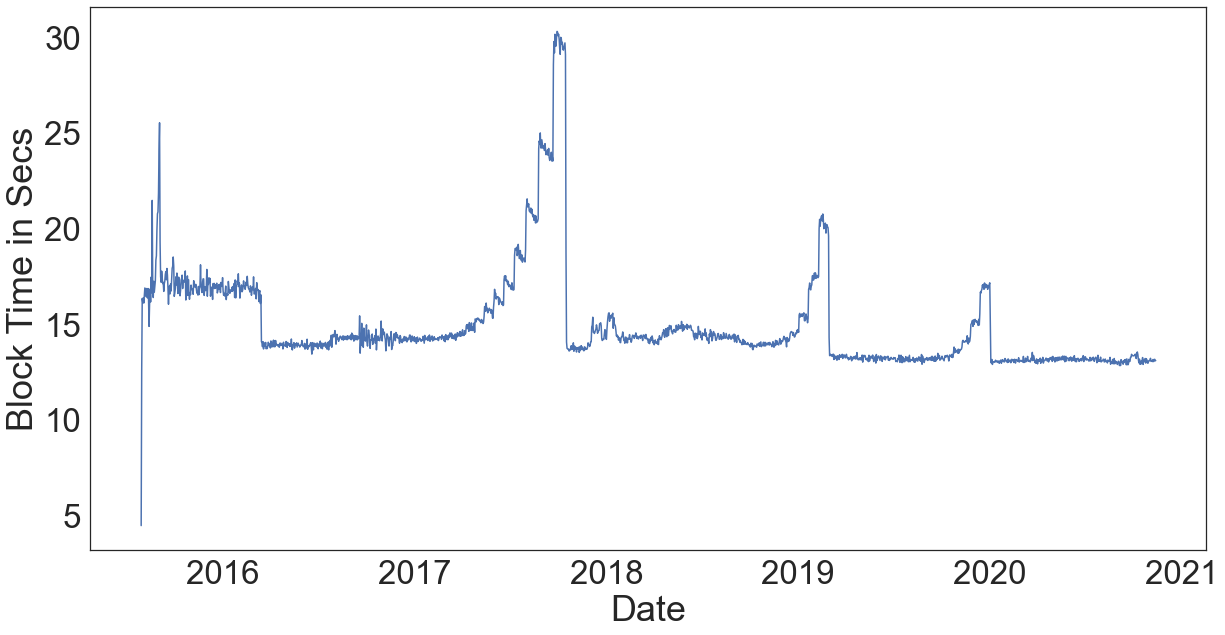

In [20]:
# load the dataset.
# Replication can easily be done by replacing the dataset.
block = pd.read_csv("data/export-BlockTime.csv",sep=",")

# re-format the column names to non-unique, as the axis labels can always be renamed later, depending on the variable of interest
# and from the date, separate year, month and week
block["Date(UTC)"] = pd.to_datetime(block["Date(UTC)"])
block.columns = ["Date","TimeStamp","Value"]

# time series plot
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=block)
ax.set_ylabel('Block Time in Secs')

years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
#this sets the x ticks at year level
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig('block_time.png', transparent = True) 

## Heatmap


In [5]:
# create a customized colormap, using RGB values
myColors = ((0.9, 0.9, 0.9), (0.0, 0.0, 1.0)) # from light to blue
cus_cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors)*20)

In [6]:
# To plot with a heatmap, the underlying data must be re-organizaed to a 2D matrix
# therefore, I aggregate the data to be mapped by year to their mean values
plot_df = df[["Year","Month","Value"]].copy()
plot_df = plot_df.pivot_table(index="Month", columns="Year", values="Value",aggfunc="mean")
plot_df.head()

Year,2015,2016,2017,2018,2019,2020
Month,,,,,,
1,nan,0.038,0.063,0.909,0.755,0.686
2,nan,0.040,0.077,0.823,0.858,0.771
3,nan,0.037,0.107,0.743,0.793,0.812
4,nan,0.036,0.127,0.819,0.799,0.867
5,nan,0.051,0.292,0.915,0.890,0.932


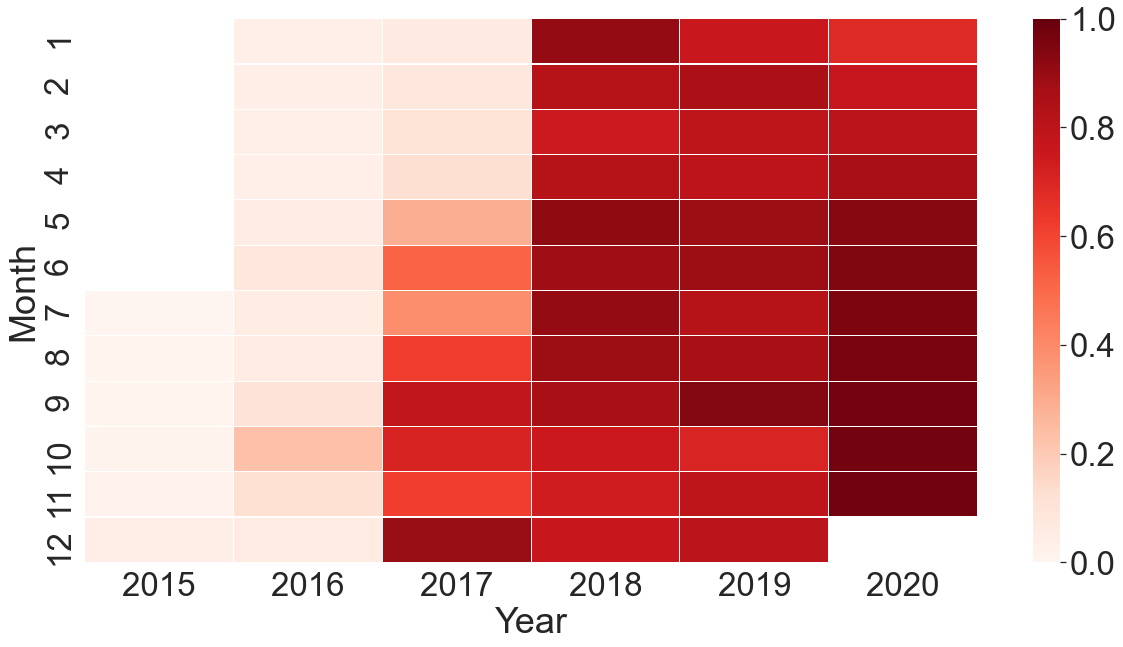

In [23]:
# heatmap with customized colormap
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(plot_df, linewidths=0.1,vmin=0, vmax=1,cmap="Reds")
plt.savefig('heatmap.png', transparent = True)

## Boxplots

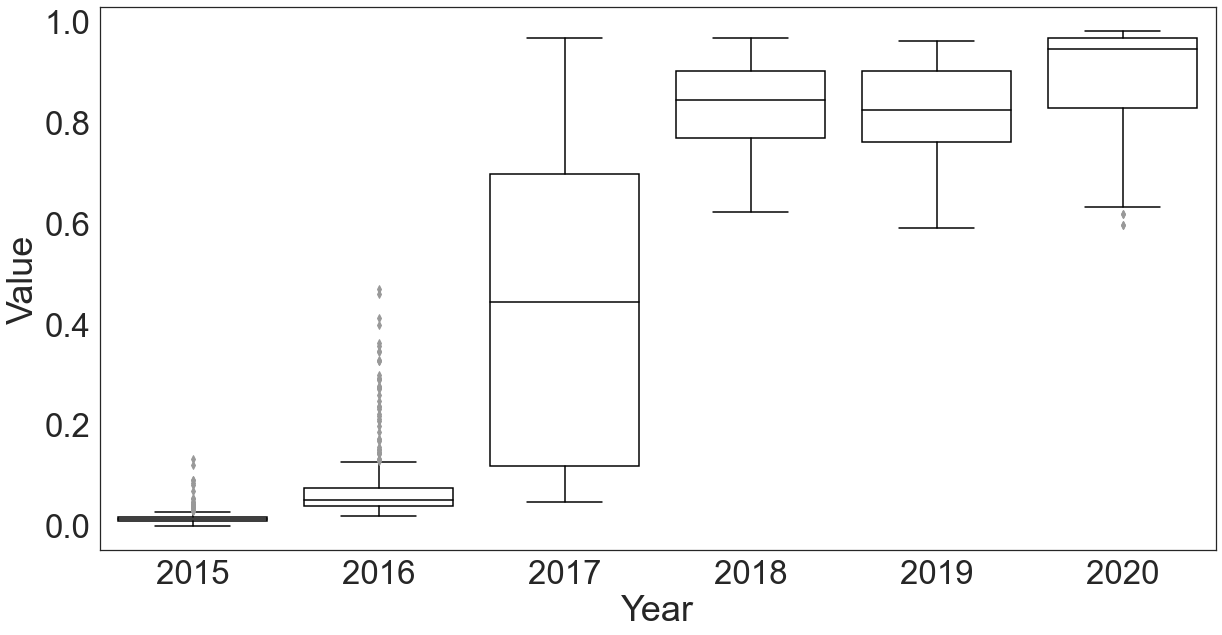

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

# with sns.boxplot, it will show the density of the variable x, after being partitioned according to the value of y.
ax = sns.boxplot(x=df["Year"],y=df["Value"], color='white') # note the color arguement here determine the color of the space within the boxes

# iterate over the boxes to color the boxes outlines in black (the default color is grey)
# codes from https://stackoverflow.com/questions/43434020/black-and-white-boxplots-in-seaborn
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

plt.savefig('boxplots.png', transparent = True)

## Violin plots

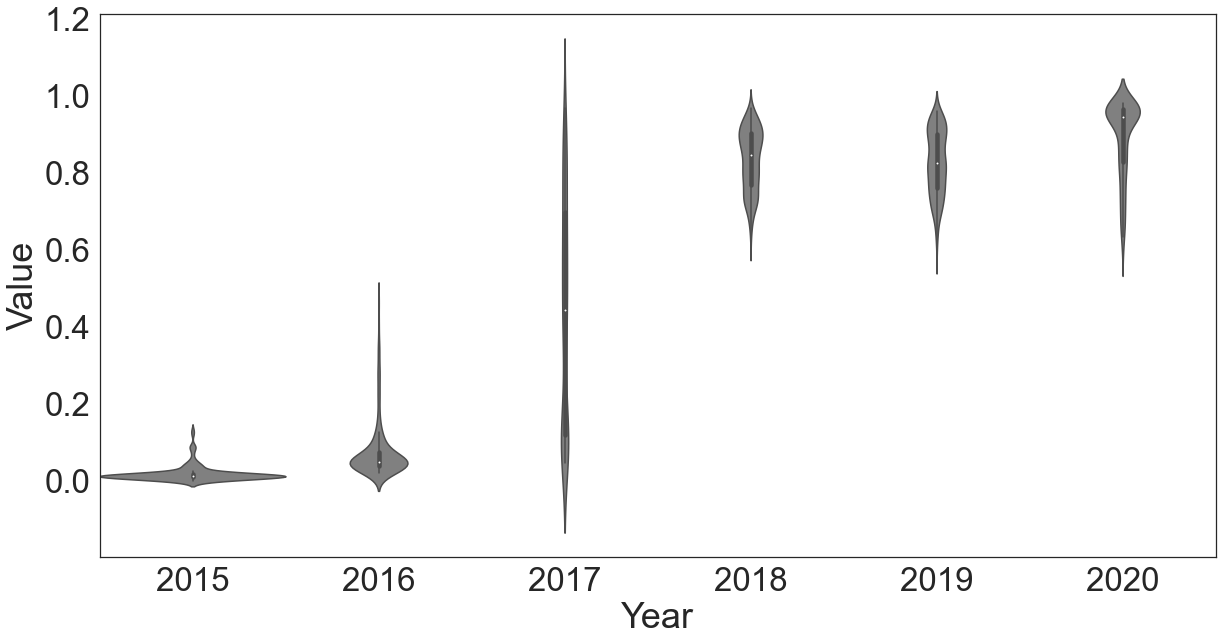

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

# the main arguements of violin plots are analogy to that of boxplots
# adjust the "width" can alter the fatness of the violine.
ax = sns.violinplot(x=df["Year"],y=df["Value"], color='grey', width=1)
plt.savefig('violins.png', transparent = True)

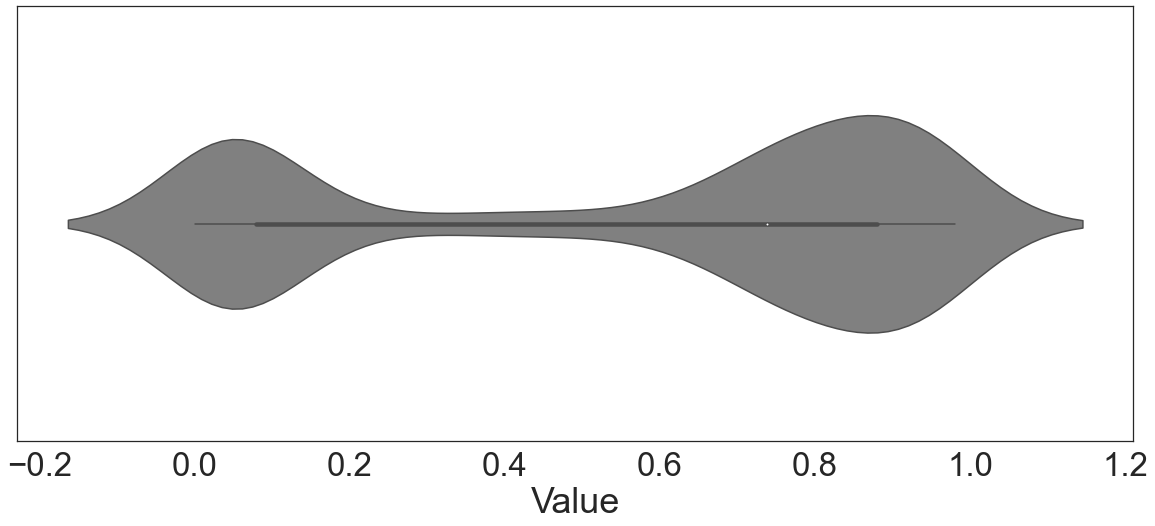

In [26]:
# horizontal violin
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.violinplot(x=df["Value"], color='grey', width=0.5, orient="h")
plt.savefig('hor_violin.png', transparent = True)

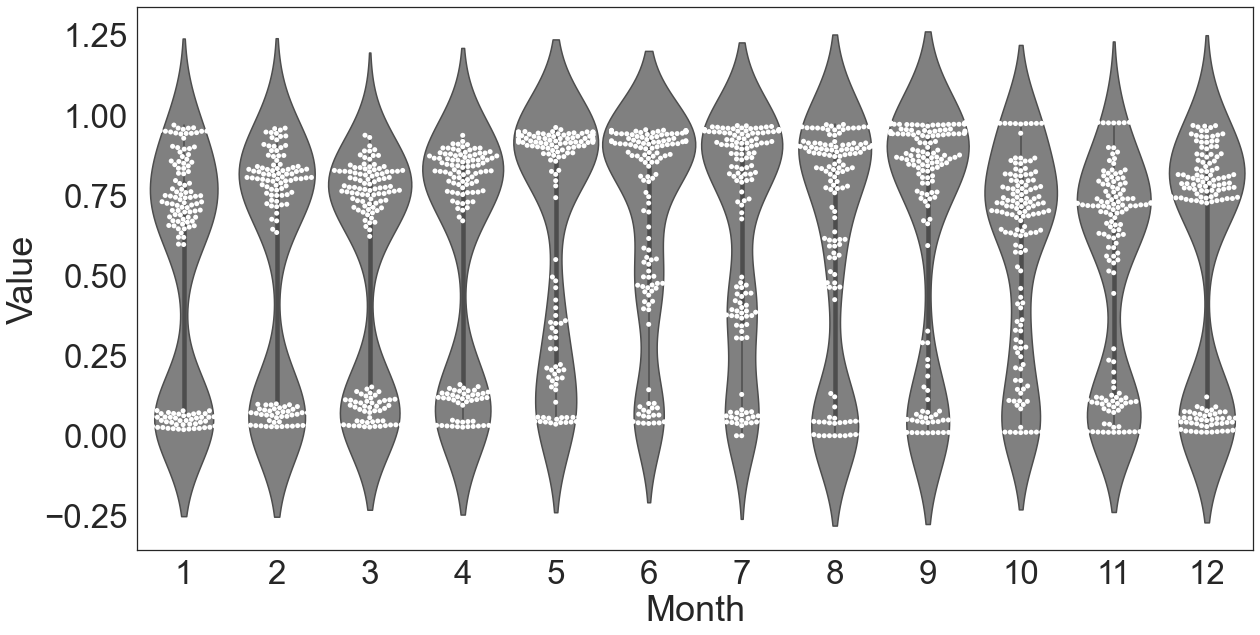

In [27]:
#Draw swarms of observations on top of a violin plot: (https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.violinplot(x=df["Month"],y=df["Value"], color='grey', width=1)
ax = sns.swarmplot(x=df["Month"], y=df["Value"], color="white", edgecolor="gray")
plt.savefig('swarm_violins.png', transparent = True)

## Density Plots


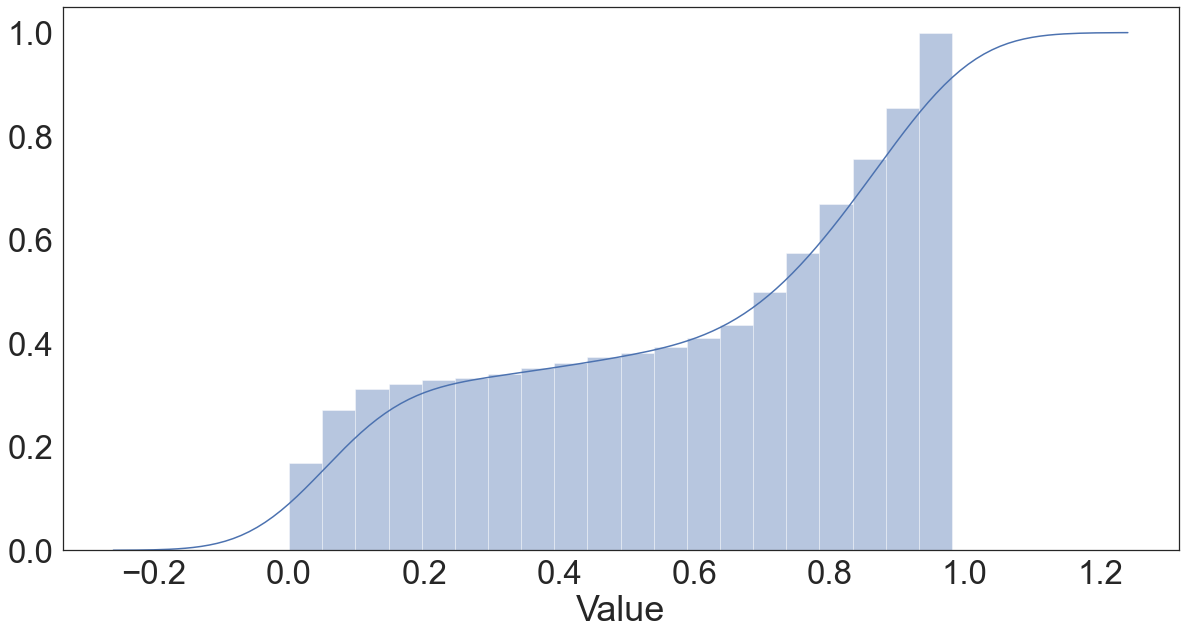

In [28]:
# Empirical Cumulative Density Function (ECDF)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.distplot(df["Value"], hist_kws={'cumulative': True}, kde_kws={'cumulative': True},bins=20)
plt.savefig('ecdf.png', transparent = True)

In [11]:
df

,Date,TimeStamp,Value,Year,Month,Week
0,2015-07-30,1438214400,0.000,2015,7,31
1,2015-07-31,1438300800,0.000,2015,7,31
2,2015-08-01,1438387200,0.000,2015,8,31
3,2015-08-02,1438473600,0.000,2015,8,31
4,2015-08-03,1438560000,0.000,2015,8,32
...,...,...,...,...,...,...
1928,2020-11-08,1604793600,0.977,2020,11,45
1929,2020-11-09,1604880000,0.978,2020,11,46
1930,2020-11-10,1604966400,0.979,2020,11,46
1931,2020-11-11,1605052800,0.978,2020,11,46


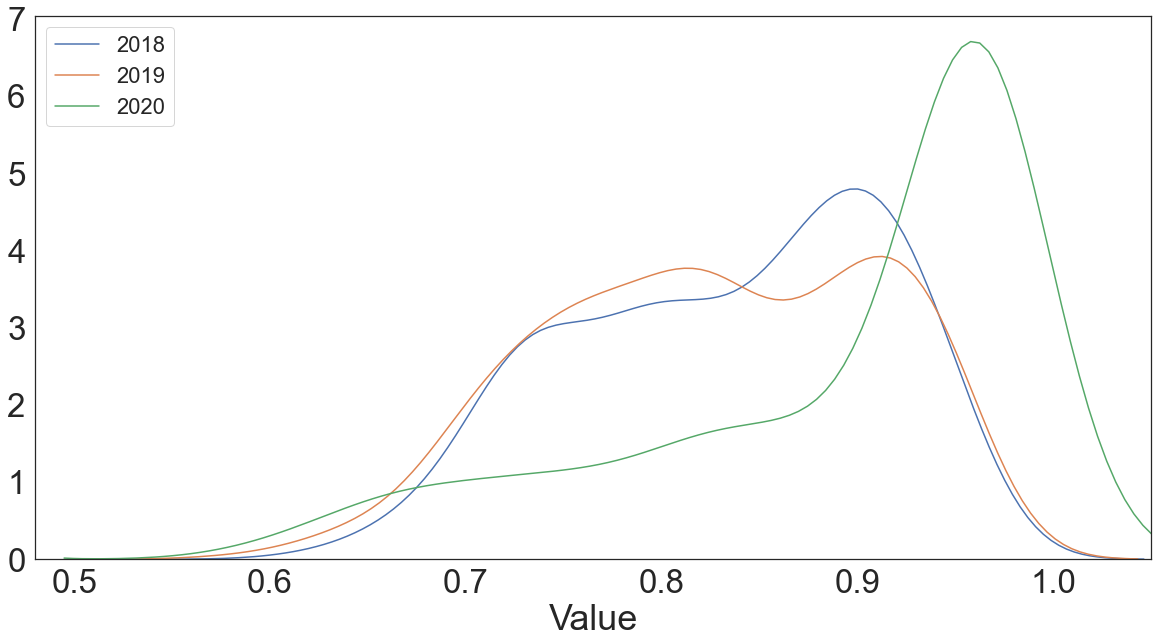

In [31]:
# overlaid density functions
fig, ax = plt.subplots(figsize=(20,10))

# plot the density for each year
for year in df.loc[df["Year"]>2017,"Year"].unique():
  sns.distplot(df.loc[df["Year"]==year,"Value"], hist=False, kde = True, label = year)
ax.legend(loc='upper left', fontsize=22)
ax.set_xlim(0.48,1.05)

plt.savefig('density.png', transparent = True)

## Partial Autocorrelations

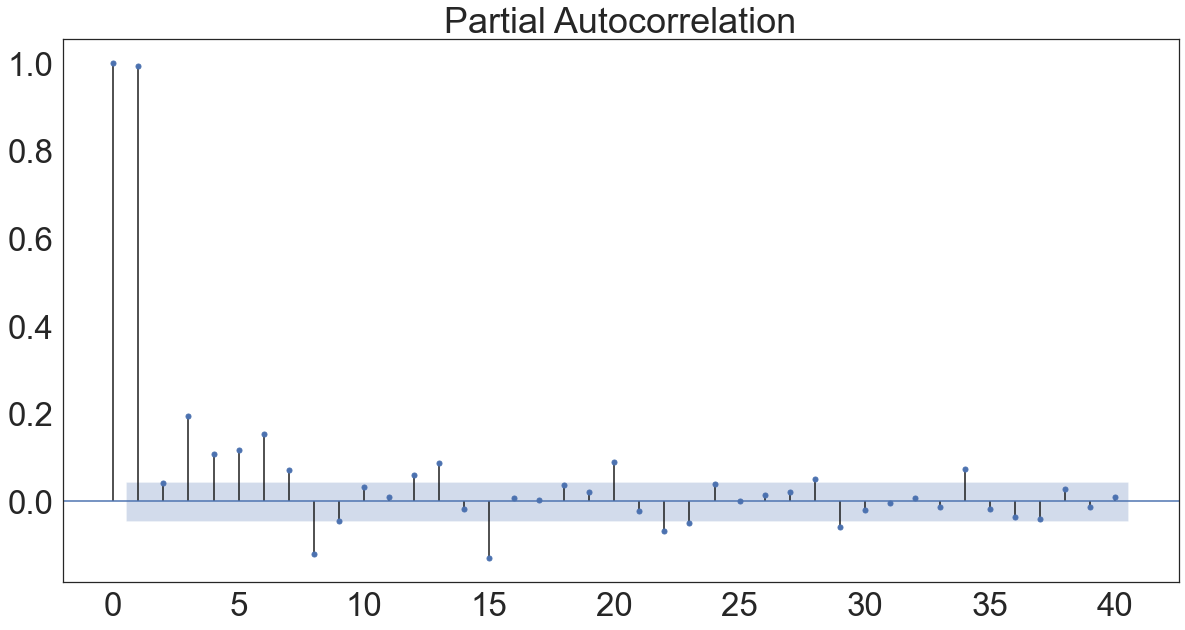

In [30]:
# partial auto correlation at daily
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(20,10))
plot_pacf(df["Value"].values, lags=40,ax=ax)
plt.savefig('part_autocorr.png', transparent = True)
plt.show()

# Multivariate Plots

The data for this section is constructed by combining 7 time-series from https://etherscan.io/charts, which are:

- Verified Contracts (https://etherscan.io/chart/verified-contracts)
- Network Utilization (https://etherscan.io/chart/networkutilization)
- Gas Used (https://etherscan.io/chart/gasused)
- Gas Limited (https://etherscan.io/chart/gaslimit)
- Ethereum Daily Transactions (https://etherscan.io/chart/tx)
- ERC20 Daily Token Transfer (https://etherscan.io/chart/tokenerc-20txns)
- Ethereum Unique Addresses (https://etherscan.io/chart/address)

However, this dataset is essentially a collection of multiple time-series, which is only truly a multivariate dataset if assuming every daily observations are independent from each other. But as the main purpose is to demostrate plotting technique, this dataset will be used.


In [31]:
# load the dataset, don't need the date as UnixTimeStamp is given
data = []
to_include = ["data/export-verified-contracts.csv",
              "data/export-NetworkUtilization.csv",
              "data/export-GasUsed.csv",
              "data/export-GasLimit.csv",
              "data/export-TxGrowth.csv",
              "data/export-tokenerc-20txns.csv",
              "data/export-AddressCount.csv"]
for i in to_include:
    table = pd.read_csv(i,sep=",").iloc[:,1:]
    variable_name = i.split(".")[0].replace("data/export-","")
    table.columns = ["UnixTimeStamp",variable_name]
    data.append(table)

# construct a main df by inner merge on date (i.e. observations with missing values on any date are dropped)
df = data[0]
for i in range(1,len(data)):
    df = df.merge(data[i],on=["UnixTimeStamp"],how="inner")
df["Date"] = pd.to_datetime(df["UnixTimeStamp"],unit="s")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.week

df.head()

,UnixTimeStamp,verified-contracts,NetworkUtilization,GasUsed,GasLimit,TxGrowth,tokenerc-20txns,AddressCount,Date,Year,Month,Week
0,1438214400,0,0.000,0,0,8893,0,9205,2015-07-30,2015,7,31
1,1438300800,0,0.000,0,0,0,0,9361,2015-07-31,2015,7,31
2,1438387200,0,0.000,0,0,0,0,9476,2015-08-01,2015,8,31
3,1438473600,0,0.000,0,0,0,0,9563,2015-08-02,2015,8,31
4,1438560000,0,0.000,0,0,0,0,9639,2015-08-03,2015,8,32


## output as a Latex table

In [32]:
# export first 10 rows as table to latex
df.iloc[0:10,0:2].to_latex("T1.tex",index=False,float_format="%.3f")

## multiple time-series

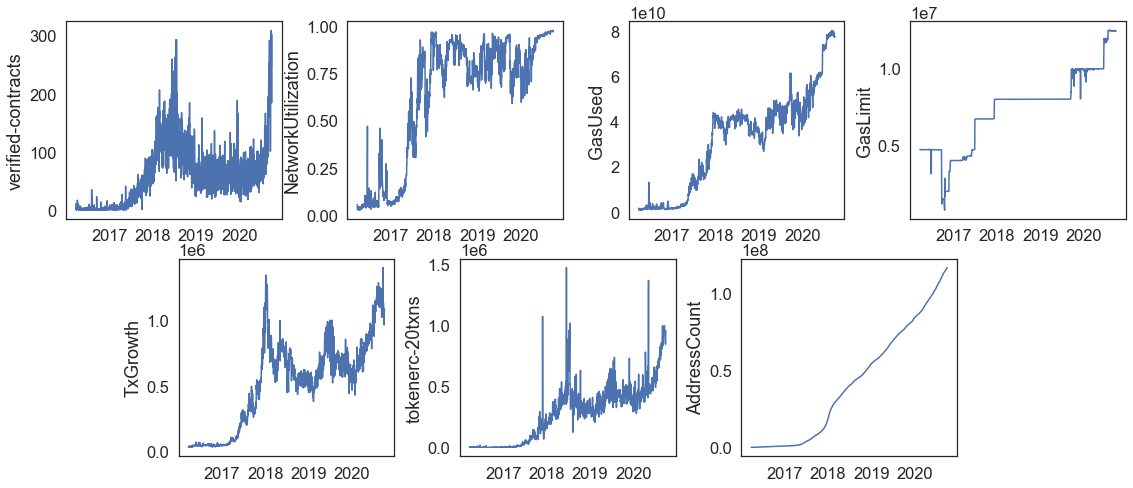

In [18]:
sns.set(font_scale = 1.5)
sns.set_style("white")
# multiple time series

fig = plt.subplots(figsize=(20, 8))

# Because there are 7 times series, I have to manually draw the frames to achieve better alignment.
gs = gridspec.GridSpec(2, 20, height_ratios=[1,1]) 
ax1 = plt.subplot(gs[0,0:4])
ax2 = plt.subplot(gs[0,5:9])
ax3 = plt.subplot(gs[0,10:14])
ax4 = plt.subplot(gs[0,15:19])
ax5 = plt.subplot(gs[1,2:6])
ax6 = plt.subplot(gs[1,7:11])
ax7 = plt.subplot(gs[1,12:16])
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]

# plot in every subplot a time series
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

for i in range(0,7):
    axes[i].plot(df["Date"],df.iloc[:,i+1])
    axes[i].xaxis.set_major_locator(YearLocator())
    years_fmt = mdates.DateFormatter('%Y')
    axes[i].xaxis.set_major_formatter(years_fmt)
    axes[i].set_ylabel(df.iloc[:,i+1].name)

plt.savefig('mult_timeser.pdf')
sns.set(font_scale = 3)
sns.set_style("white")

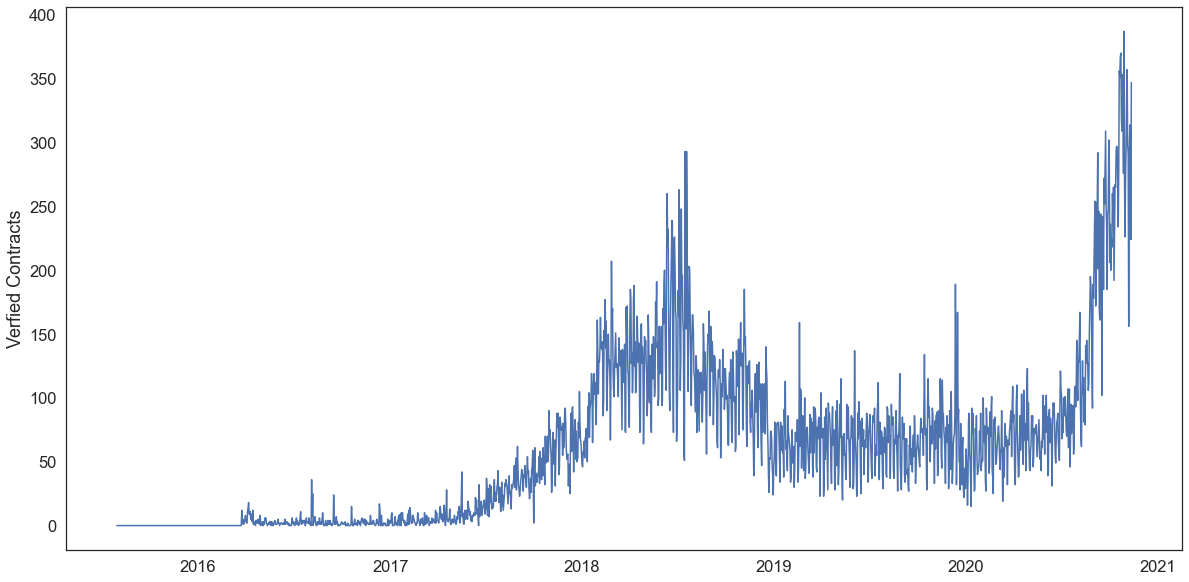

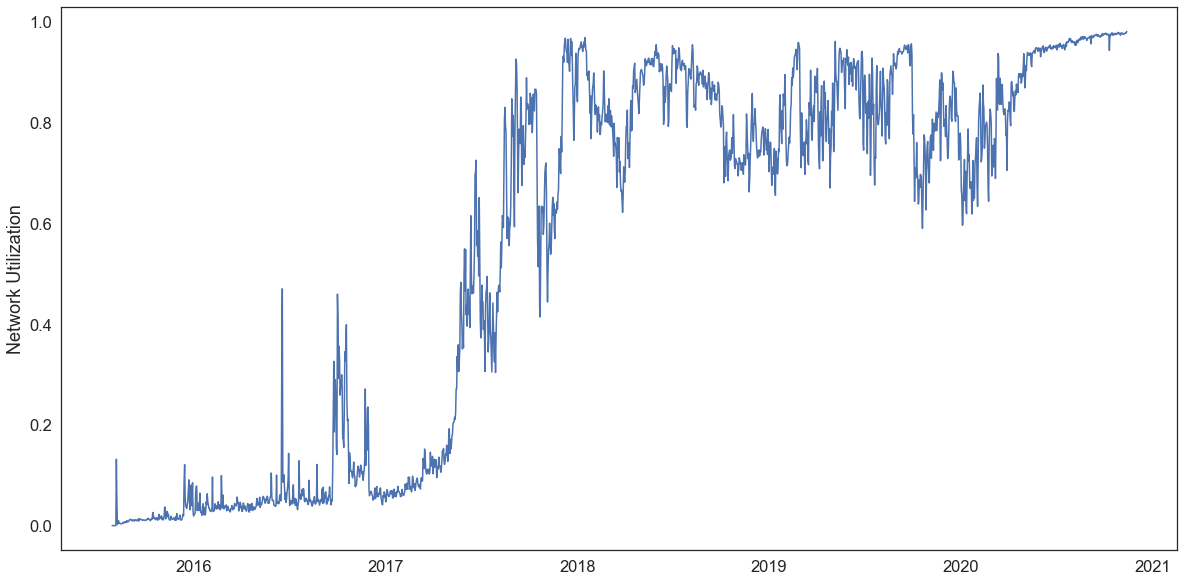

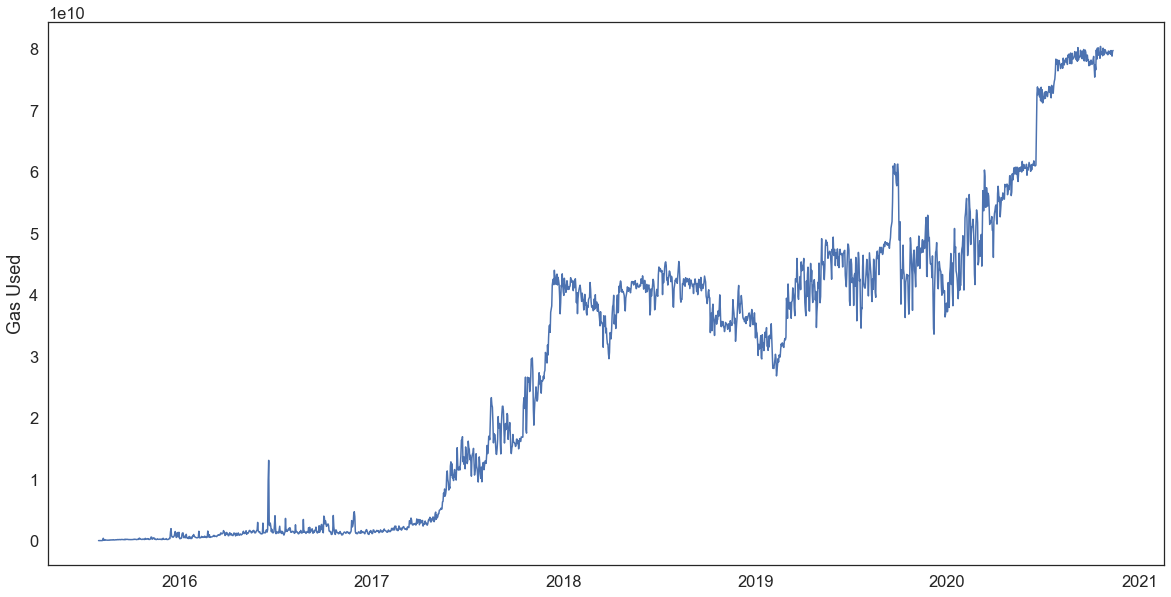

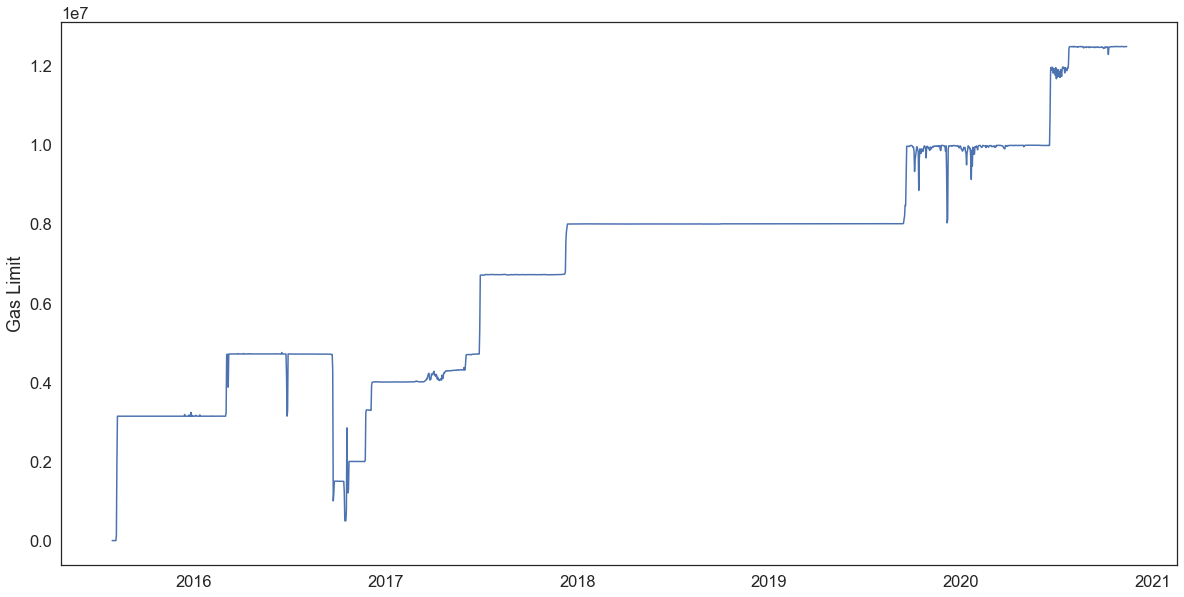

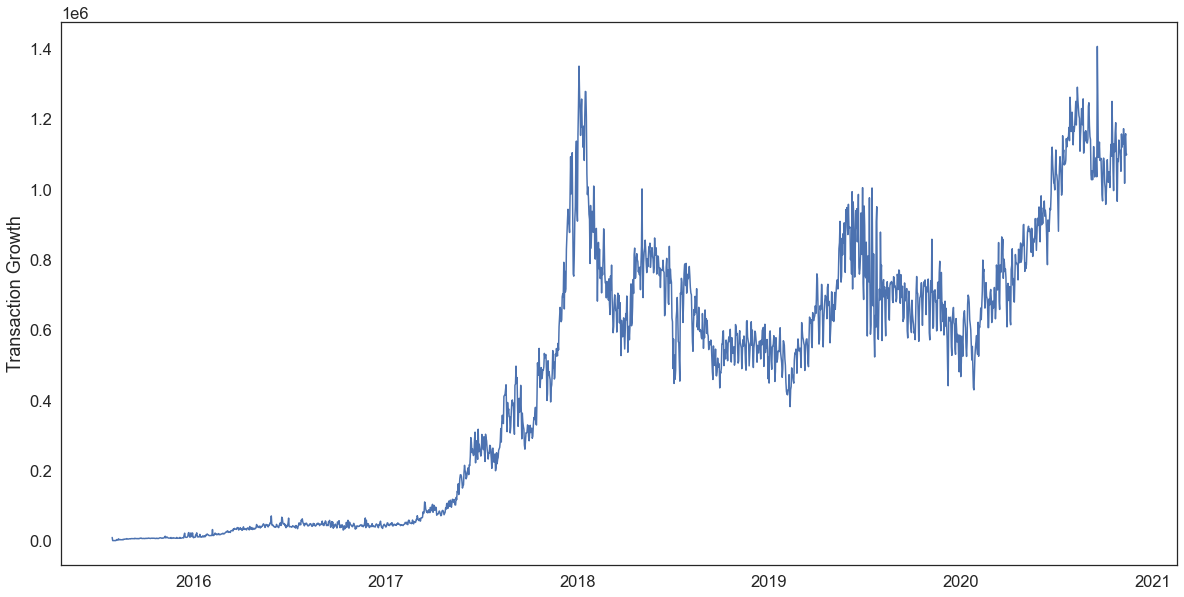

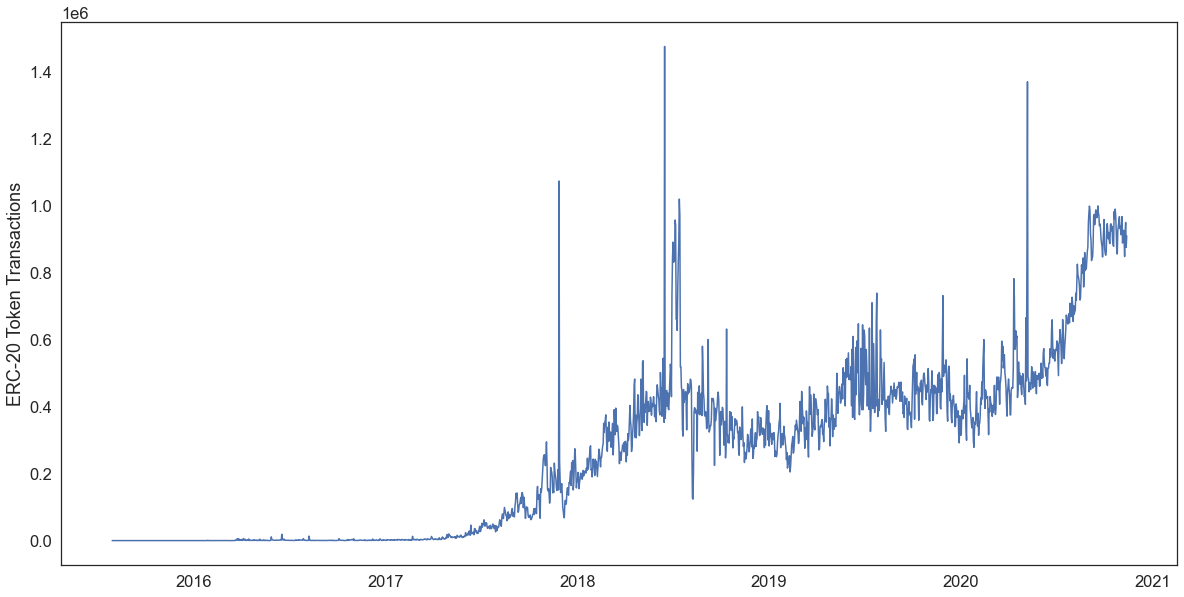

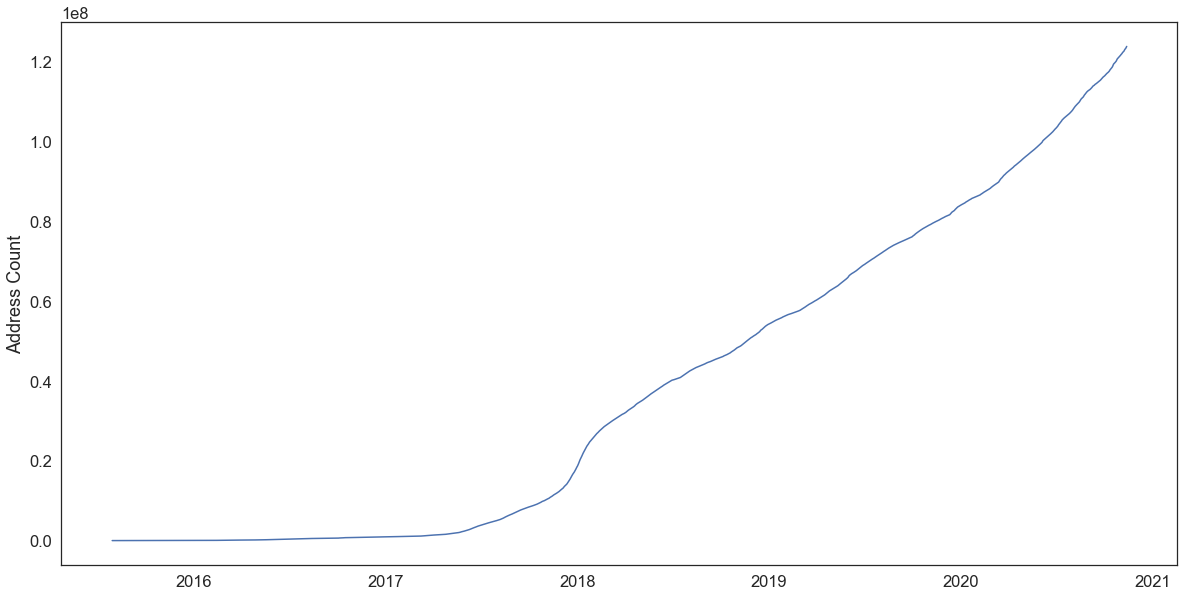

In [39]:
sns.set(font_scale = 3)
sns.set_style("white")

# Individual plots from above
ylabels = ["Verfied Contracts", "Network Utilization", "Gas Used", "Gas Limit", "Transaction Growth", 
          "ERC-20 Token Transactions", "Address Count"]
for i in range(0,7):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(df["Date"],df.iloc[:,i+1])
    ax.xaxis.set_major_locator(YearLocator())
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(years_fmt)
    ax.set_ylabel(ylabels[i])
    plt.savefig(df.iloc[:,i+1].name + '.png', transparent = True)

## Correlation Matrix and Correlation Heatmap

In [41]:
# correlation matrix
# maybe the correlation should be run on transformed variables (i.e. de-trended or first difference)
corr = df[["verified-contracts","NetworkUtilization","GasUsed","GasLimit","TxGrowth","tokenerc-20txns","AddressCount"]].corr()
corr

,verified-contracts,NetworkUtilization,GasUsed,GasLimit,TxGrowth,tokenerc-20txns,AddressCount
verified-contracts,1.000,0.721,0.770,0.731,0.761,0.792,0.648
NetworkUtilization,0.721,1.000,0.911,0.875,0.927,0.819,0.787
GasUsed,0.770,0.911,1.000,0.956,0.958,0.935,0.937
GasLimit,0.731,0.875,0.956,1.000,0.911,0.888,0.915
TxGrowth,0.761,0.927,0.958,0.911,1.000,0.874,0.840
tokenerc-20txns,0.792,0.819,0.935,0.888,0.874,1.000,0.906
AddressCount,0.648,0.787,0.937,0.915,0.840,0.906,1.000


In [20]:
sns.set(font_scale = 3)
sns.set_style("white")

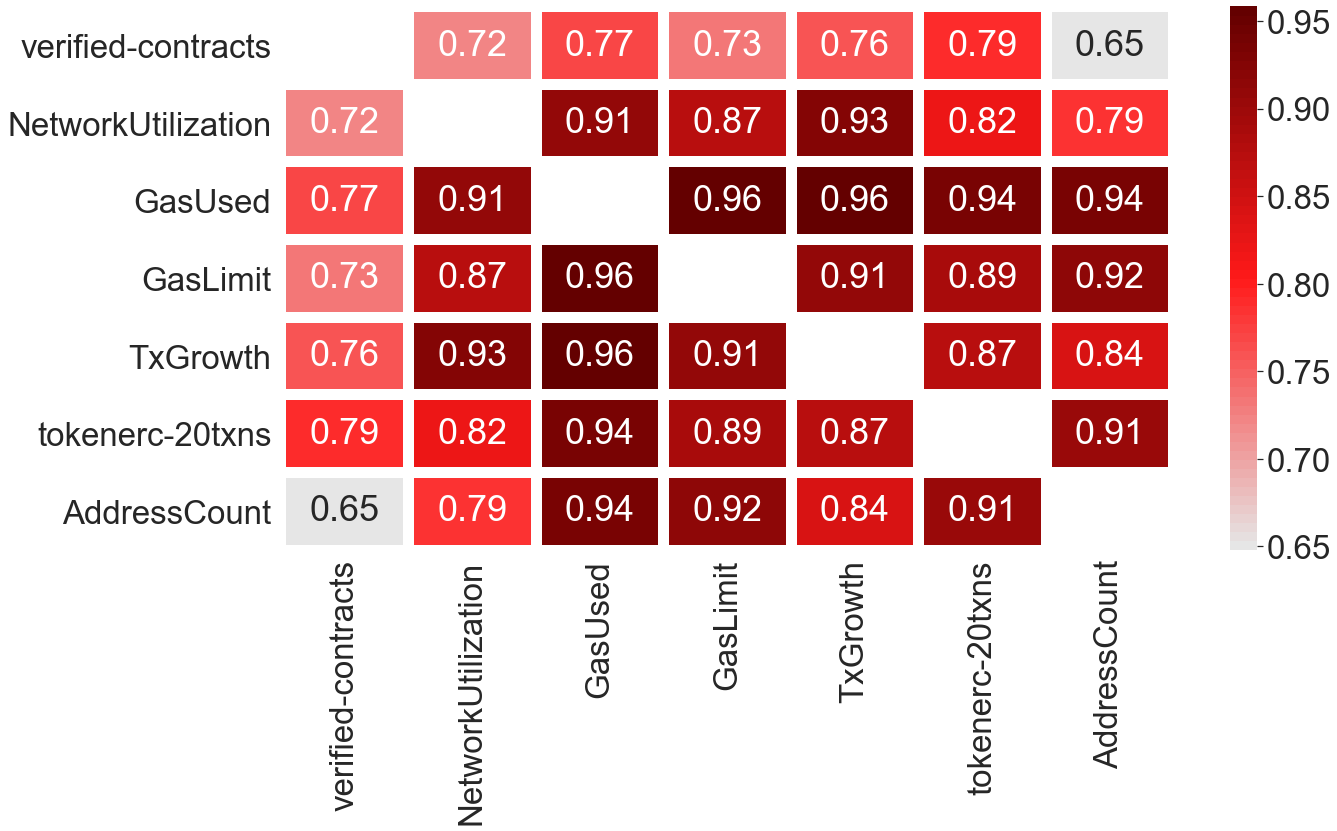

In [43]:
# As in the step above, we already have a 2D correlation matrix. We can directly plot it in a heatmap.

# create custom colormap
myColors = ((0.9, 0.9, 0.9), (1, 0.1, 0.1), (100/255, 0.0, 0.0)) # from light red to deep red
cus_cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors)*20)

# create a mask same dimention as the corr matrix, but with 1 on the diagonal and 0 everywhere else. 
# https://stackoverflow.com/questions/24475094/set-values-on-the-diagonal-of-pandas-dataframe
mask = np.zeros(corr.shape)
np.fill_diagonal(mask,1)

# create the heatmap with custom color map and the mask on top
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr, linewidths=10, cmap=cus_cmap, annot=True, mask=mask)
plt.savefig('heatmap2.png', transparent = True, bbox_inches='tight')

## Radar plot

In [44]:
# I aggregate the data by mean at month level, in hope of resulting a slightly more randomized dataset.
# But this step does not matter for the plot in a technical perspective
# As can be compared to the original dataset, the data now indexed by month instead of by day, which is the only difference.
df_grouped = df[["verified-contracts","NetworkUtilization","GasUsed","GasLimit","TxGrowth","tokenerc-20txns","AddressCount","Month"]].groupby("Month").mean()
df_grouped.head()

,verified-contracts,NetworkUtilization,GasUsed,GasLimit,TxGrowth,tokenerc-20txns,AddressCount
Month,,,,,,,
1,42.471,0.490,"23,810,112,916.310","6,595,443.065","448,979.890","180,143.277","32,866,444.987"
2,53.514,0.512,"24,340,406,261.556","6,620,628.373","399,920.725","193,741.070","34,792,019.585"
3,51.826,0.498,"26,286,580,045.394","6,910,696.123","415,379.252","226,492.394","36,312,800.006"
4,56.427,0.529,"27,905,687,499.973","6,973,285.653","449,875.007","242,362.133","38,171,222.973"
5,53.652,0.616,"31,067,993,802.148","7,000,556.161","526,961.865","274,877.213","40,102,807.135"


In [45]:
# In Radar plot, it is better to scale the data firstly for better visualization.
# Here I do it with MinMax
scaler = MinMaxScaler()
plot_data = scaler.fit_transform(df_grouped)
pd.DataFrame(plot_data)

,0,1,2,3,4,5,6
0,0.000,0.000,0.000,0.077,0.288,0.000,0.190
1,0.260,0.127,0.051,0.097,0.000,0.080,0.332
2,0.221,0.046,0.239,0.322,0.091,0.273,0.443
3,0.329,0.224,0.396,0.371,0.293,0.366,0.580
4,0.264,0.721,0.701,0.392,0.745,0.557,0.722
5,0.504,1.000,0.916,0.558,1.000,0.733,0.884
6,0.610,0.739,1.000,1.000,0.865,1.000,1.000
7,0.345,0.437,0.640,0.429,0.510,0.587,0.635
8,0.692,0.701,0.804,0.511,0.314,0.733,0.755
9,1.000,0.425,0.628,0.350,0.349,0.755,0.881


In [46]:
# In this step I define how many dimensions we want and what their names are.
# the number of dimensions are transformed into an array that represent the angle between a pair of dimensions
# modified from https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
labels=np.array(df_grouped.columns)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
labels, angles

(array(['verified-contracts', 'NetworkUtilization', 'GasUsed', 'GasLimit',
        'TxGrowth', 'tokenerc-20txns', 'AddressCount'], dtype=object),
 array([0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 0.        ]))

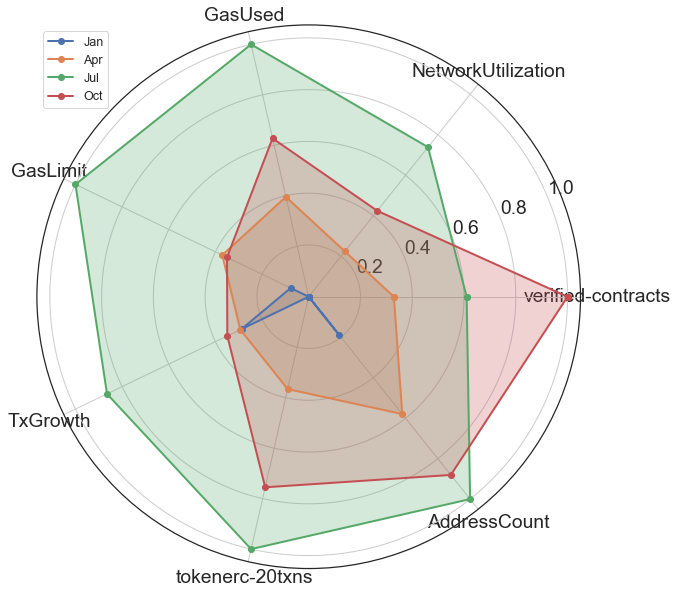

In [48]:
sns.set(font_scale = 1.75)
sns.set_style("white")

fig = plt.figure(figsize=(20,10))
# we first draw a polar
ax = fig.add_subplot(111, polar=True)

# then map the observations one by one
for i in range(0,4): #plot all 12 months will be messy, so only the first of a quarter
  stats = plot_data[i*3]
  stats=np.concatenate((stats,[stats[0]]))
  ax.plot(angles, stats, 'o-', linewidth=2)
  ax.fill(angles, stats, alpha=0.25)
  ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True) #The author had this line, but I don't see any difference
ax.legend(["Jan","Apr","Jul","Oct"],loc="upper left",fontsize=12.5)
plt.savefig('radar.png', transparent = True)

sns.set(font_scale = 3)
sns.set_style("white")

## Density Contour Plot

In [49]:
sns.set(font_scale = 3)
sns.set_style("white")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


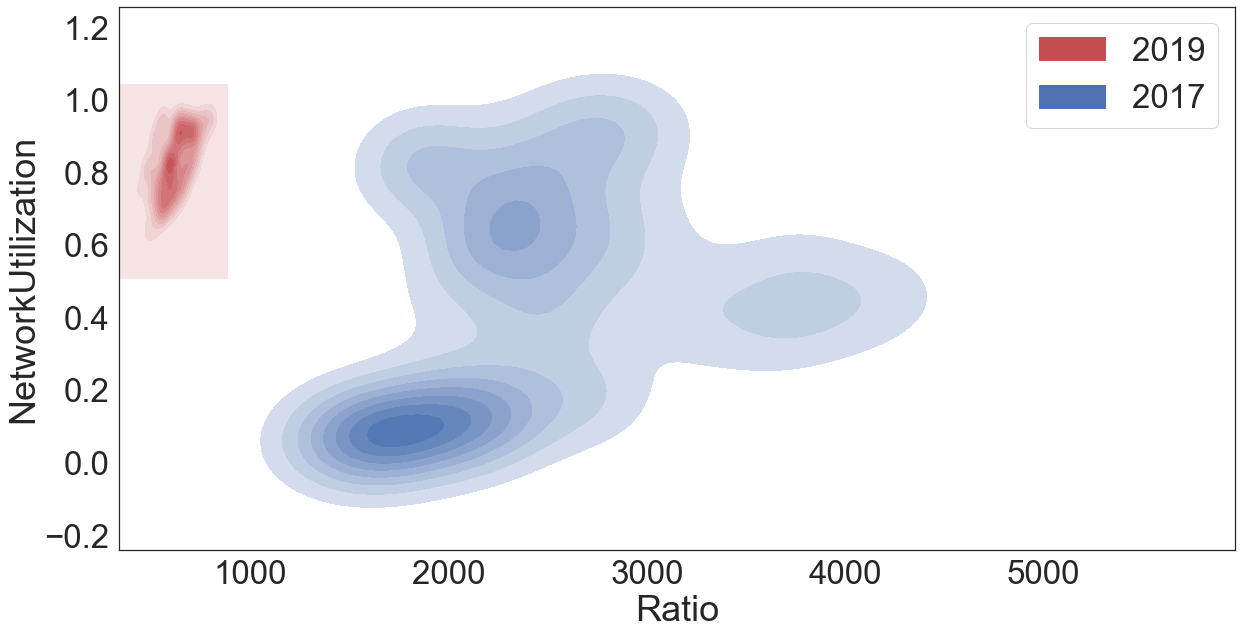

In [50]:
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
#https://stackoverflow.com/questions/49991657/add-labels-to-seaborn-bivariate-kde-plot

#changed from 2018 to 2017

df["Ratio"] = df["GasUsed"]/df["AddressCount"] #Just a ratio, can be anything else
fig, ax = plt.subplots(figsize=(20,10))

#I want to show the difference between shade_lowest=True and shade_lowest=False
ax = sns.kdeplot(df.loc[df["Year"]==2019,"Ratio"],  df.loc[df["Year"]==2019,'NetworkUtilization'], color='r', shade=True, Label='2019', shade_lowest=True)
ax = sns.kdeplot(df.loc[df["Year"]==2017,"Ratio"],  df.loc[df["Year"]==2017,'NetworkUtilization'], color='b', shade=True, Label='2018', shade_lowest=False)

# it seems one have to add the color legend by oneself when ploting bivariate coutour.
# it's only two so I did it raw without a loop
label_patches = []
Y2019 = mpatches.Patch(color='r',label='2019')
label_patches.append(Y2019)
Y2017 = mpatches.Patch(color='b',label='2017')
label_patches.append(Y2017)

plt.legend(handles=label_patches, loc='upper right')
plt.savefig('contour.png', transparent = True)

# 3D plots

In 3D plots, I use the same dataset as in multivariate plots, but condition on observations on or after 2018. The purpose is to reduce the size of the dataset to save a bit of resources.

In [51]:
# I use the subset from 2018 onwards
df = df.loc[df["Year"]>=2018,:]

In [52]:
df.head()

,UnixTimeStamp,verified-contracts,NetworkUtilization,GasUsed,GasLimit,TxGrowth,tokenerc-20txns,AddressCount,Date,Year,Month,Week,Ratio
886,1514764800,48,0.842,39876127062,7996099,908945,175286,18673081,2018-01-01,2018,1,1,"2,135.487"
887,1514851200,46,0.928,42671435301,7996534,1153936,203644,18945115,2018-01-02,2018,1,1,"2,252.371"
888,1514937600,58,0.943,41794056176,7997271,1238030,190084,19268312,2018-01-03,2018,1,1,"2,169.056"
889,1515024000,58,0.948,41332879147,7998221,1349890,155054,19624038,2018-01-04,2018,1,1,"2,106.237"
890,1515110400,66,0.945,40379621205,7997843,1271577,173793,19970449,2018-01-05,2018,1,1,"2,021.969"


In [53]:
sns.set(font_scale = 1.25)
sns.set_style("white")

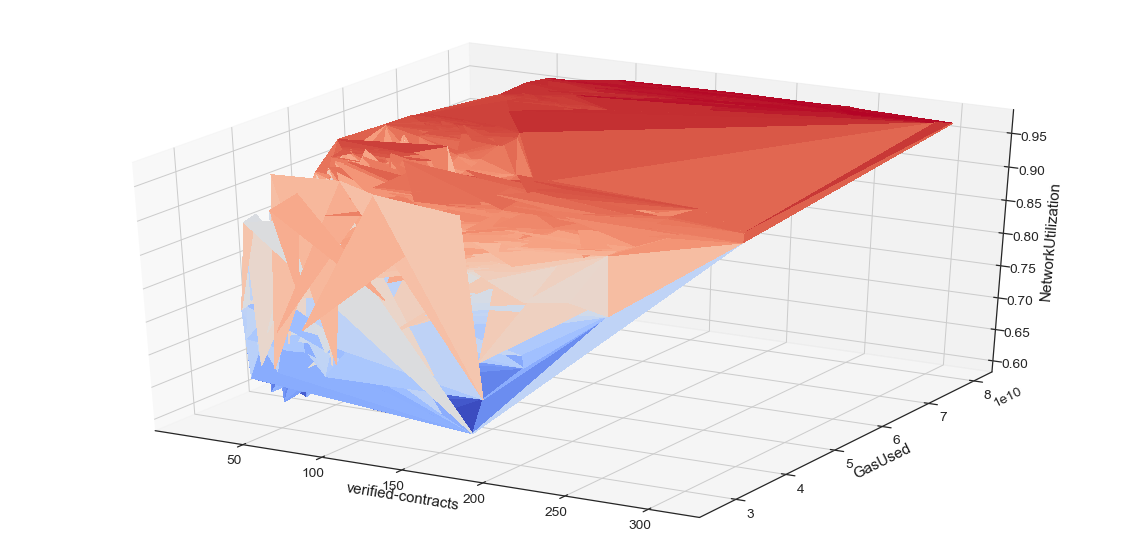

In [48]:
# surface plots
fig = plt.figure(figsize=(20,10))
ax=fig.gca(projection='3d')
ax.plot_trisurf(df["verified-contracts"], df["GasUsed"], df["NetworkUtilization"],cmap=cm.coolwarm,linewidth=0, antialiased=False)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(3,integer=True))
ax.set_xlabel("verified-contracts", color="k")
ax.set_ylabel("GasUsed", color="k")
ax.set_zlabel("NetworkUtilization", color="k")
#fig.colorbar(surf, shrink=0.5, aspect=5) #to include a color bar
plt.show()

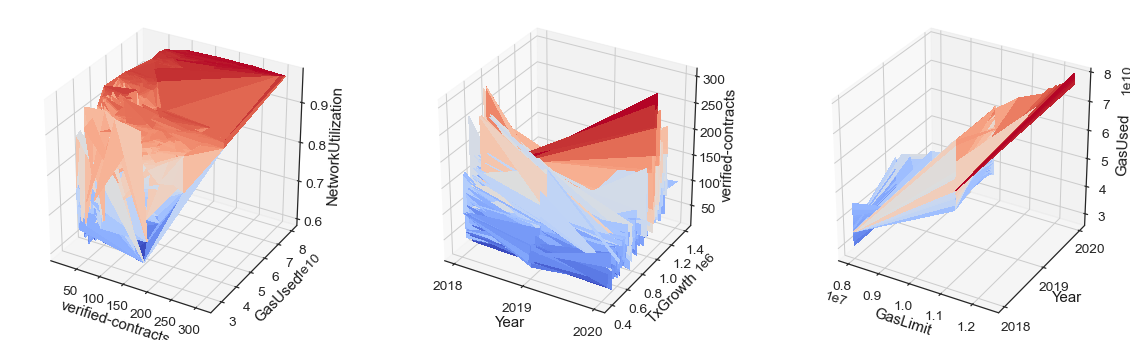

In [49]:
# multiple surface plots
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_trisurf(df["verified-contracts"], df["GasUsed"], df["NetworkUtilization"],cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax1.set_xlabel("verified-contracts", color="k")
ax1.set_ylabel("GasUsed", color="k")
ax1.set_zlabel("NetworkUtilization", color="k")


ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_trisurf(df["Year"], df["TxGrowth"], df["verified-contracts"],cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax2.set_xlabel("Year", color="k")
ax2.xaxis.set_major_locator(ticker.MaxNLocator(3,integer=True))
ax2.set_ylabel("TxGrowth", color="k")
ax2.set_zlabel("verified-contracts", color="k")


ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_trisurf(df["GasLimit"], df["Year"], df["GasUsed"],cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax3.set_xlabel("GasLimit", color="k")
ax3.set_ylabel("Year", color="k")
ax3.yaxis.set_major_locator(ticker.MaxNLocator(3,integer=True))
ax3.set_zlabel("GasUsed", color="k")

plt.show()

In [15]:
# open interactive window to enable rotation
%matplotlib qt
# 3D scatter plots by groups and with variable sizes

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
# ax = fig.gca(projection='3d')
ax = axes3d.Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
legend_list = []

for year in df["Year"].unique():
  plot_data = df.loc[df["Year"]==year,:]
  #"s" determines the size of the markers
  ax.scatter(xs=plot_data["verified-contracts"], ys=plot_data["GasUsed"], zs=plot_data["NetworkUtilization"], s=plot_data["Week"])
  legend_list.append(year) #keep the names of the markers

ax.set_xlabel("verified-contracts", color="k")
ax.set_ylabel("GasUsed", color="k")
ax.set_zlabel("NetworkUtilization", color="k")
ax.legend(legend_list)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

# switch back to regular inline display of matplotlib plots
%matplotlib inline

# plt.show()